In [545]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [546]:
df=pd.read_csv('student-mat.csv')

In [547]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [548]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [549]:
x=df[['traveltime','studytime','failures','schoolsup','famsup','paid','internet','freetime','goout','health','absences']]

In [550]:
x

,traveltime,studytime,failures,schoolsup,famsup,paid,internet,freetime,goout,health,absences
0,2,2,0,yes,no,no,no,3,4,3,6
1,1,2,0,no,yes,no,yes,3,3,3,4
2,1,2,3,yes,no,yes,yes,3,2,3,10
3,1,3,0,no,yes,yes,yes,2,2,5,2
4,1,2,0,no,yes,yes,no,3,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...
390,1,2,2,no,yes,yes,no,5,4,4,11
391,2,1,0,no,no,no,yes,4,5,2,3
392,1,1,3,no,no,no,no,5,3,3,3
393,3,1,0,no,no,no,yes,4,1,5,0


In [551]:
y=(df['G3']>=10).astype(int)

In [552]:
y

0      0
1      0
2      1
3      1
4      1
      ..
390    0
391    1
392    0
393    1
394    0
Name: G3, Length: 395, dtype: int64

In [553]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   traveltime  395 non-null    int64 
 1   studytime   395 non-null    int64 
 2   failures    395 non-null    int64 
 3   schoolsup   395 non-null    object
 4   famsup      395 non-null    object
 5   paid        395 non-null    object
 6   internet    395 non-null    object
 7   freetime    395 non-null    int64 
 8   goout       395 non-null    int64 
 9   health      395 non-null    int64 
 10  absences    395 non-null    int64 
dtypes: int64(7), object(4)
memory usage: 34.1+ KB


In [554]:
x['schoolsup']

0      yes
1       no
2      yes
3       no
4       no
      ... 
390     no
391     no
392     no
393     no
394     no
Name: schoolsup, Length: 395, dtype: object

In [555]:
x

,traveltime,studytime,failures,schoolsup,famsup,paid,internet,freetime,goout,health,absences
0,2,2,0,yes,no,no,no,3,4,3,6
1,1,2,0,no,yes,no,yes,3,3,3,4
2,1,2,3,yes,no,yes,yes,3,2,3,10
3,1,3,0,no,yes,yes,yes,2,2,5,2
4,1,2,0,no,yes,yes,no,3,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...
390,1,2,2,no,yes,yes,no,5,4,4,11
391,2,1,0,no,no,no,yes,4,5,2,3
392,1,1,3,no,no,no,no,5,3,3,3
393,3,1,0,no,no,no,yes,4,1,5,0


In [556]:
x[['famsup','paid','internet']]

,famsup,paid,internet
0,no,no,no
1,yes,no,yes
2,no,yes,yes
3,yes,yes,yes
4,yes,yes,no
...,...,...,...
390,yes,yes,no
391,no,no,yes
392,no,no,no
393,no,no,yes


In [557]:
from sklearn.preprocessing import LabelEncoder

In [558]:
le=LabelEncoder()

In [559]:
x['schoolsup']

0      yes
1       no
2      yes
3       no
4       no
      ... 
390     no
391     no
392     no
393     no
394     no
Name: schoolsup, Length: 395, dtype: object

In [560]:
x.loc[:,'schoolsup']=le.fit_transform(x['schoolsup'])
x.loc[:,'famsup']=le.fit_transform(x['famsup'])
x.loc[:,'paid']=le.fit_transform(x['paid'])
x.loc[:,'internet']=le.fit_transform(x['internet'])

In [561]:
x

,traveltime,studytime,failures,schoolsup,famsup,paid,internet,freetime,goout,health,absences
0,2,2,0,1,0,0,0,3,4,3,6
1,1,2,0,0,1,0,1,3,3,3,4
2,1,2,3,1,0,1,1,3,2,3,10
3,1,3,0,0,1,1,1,2,2,5,2
4,1,2,0,0,1,1,0,3,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...
390,1,2,2,0,1,1,0,5,4,4,11
391,2,1,0,0,0,0,1,4,5,2,3
392,1,1,3,0,0,0,0,5,3,3,3
393,3,1,0,0,0,0,1,4,1,5,0


In [562]:
y

0      0
1      0
2      1
3      1
4      1
      ..
390    0
391    1
392    0
393    1
394    0
Name: G3, Length: 395, dtype: int64

In [563]:
x.describe()

,traveltime,studytime,failures,freetime,goout,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,1.448101,2.035443,0.334177,3.235443,3.108861,3.554430,5.708861
std,0.697505,0.839240,0.743651,0.998862,1.113278,1.390303,8.003096
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000
50%,1.000000,2.000000,0.000000,3.000000,3.000000,4.000000,4.000000
75%,2.000000,2.000000,0.000000,4.000000,4.000000,5.000000,8.000000
max,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,75.000000


In [564]:
import seaborn as sns

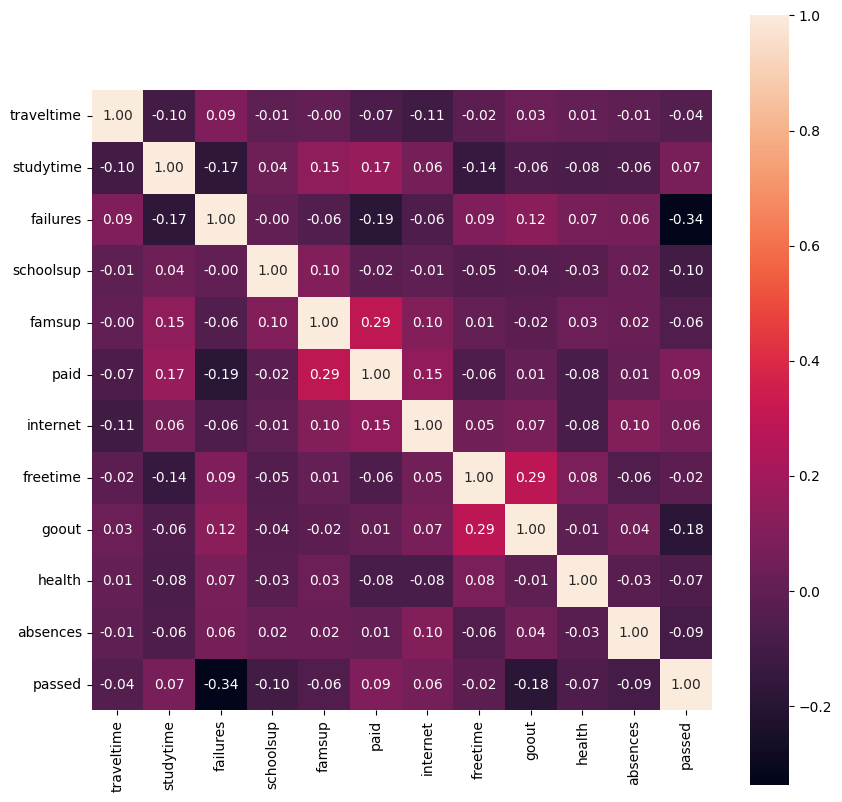

In [565]:
df_heat=x.copy()
df_heat['passed']=y
corr=df_heat.corr()
plt.figure(figsize=(10,10))
sns.heatmap(
    corr,annot=True,fmt=".2f",square=True
)
plt.show()

In [566]:
from sklearn.model_selection import train_test_split

In [567]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

In [568]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(316, 11) (316,) (79, 11) (79,)


In [569]:
from sklearn.preprocessing import StandardScaler

In [570]:
sc=StandardScaler()

In [580]:
x_train_norm=sc.fit_transform(x_train)
x_test_norm=sc.transform(x_test)


In [581]:
import tensorflow
from tensorflow import keras

In [582]:
model=keras.Sequential([
    keras.layers.Dense(units=32,activation='relu',kernel_regularizer=keras.regularizers.l2(0.0001),input_shape=(x_train_norm.shape[1],)),
    keras.layers.Dense(units=16,activation='relu',kernel_regularizer=keras.regularizers.l2(0.0001)),
    keras.layers.Dense(1,activation='sigmoid')]
)

c:\Users\swapn\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [583]:
early_stopping=tensorflow.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    restore_best_weights=True,
    verbose=1,
    baseline=None,
    mode='auto'
)

In [585]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [586]:
y.value_counts(normalize=True)

G3
1    0.670886
0    0.329114
Name: proportion, dtype: float64

In [592]:
model_history=model.fit(x_train,y_train,validation_split=0.1,epochs=300,batch_size=16,callbacks=[early_stopping],class_weight={0:2.0,1:1.0})

Epoch 1/300


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7887 - loss: 0.7348 - val_accuracy: 0.6250 - val_loss: 0.6128
Epoch 2/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7782 - loss: 0.6980 - val_accuracy: 0.6250 - val_loss: 0.6322
Epoch 3/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7958 - loss: 0.6868 - val_accuracy: 0.6250 - val_loss: 0.6273
Epoch 4/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7923 - loss: 0.6763 - val_accuracy: 0.6250 - val_loss: 0.6493
Epoch 5/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7993 - loss: 0.6697 - val_accuracy: 0.6250 - val_loss: 0.6290
Epoch 6/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7993 - loss: 0.6599 - val_accuracy: 0.6250 - val_loss: 0.6457
Epoch 7/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7958 - loss: 0.6505 - val_accuracy: 0.6250 - val_loss: 0.6563
Epoch 8/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8028 - loss: 0.6480 - val_accuracy: 0.6250 - val_loss: 0.6

In [593]:
y_prob=model.predict(x_test_norm)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [597]:
y_pred=(y_prob>=0.35).astype(int)

In [598]:
y_pred

array([[1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1]])

In [599]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6329113924050633
Confusion Matrix:
 [[ 4 22]
 [ 7 46]]
              precision    recall  f1-score   support

           0       0.36      0.15      0.22        26
           1       0.68      0.87      0.76        53

    accuracy                           0.63        79
   macro avg       0.52      0.51      0.49        79
weighted avg       0.57      0.63      0.58        79

